In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# load data
path = r'../data/housing.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# missing values
df.isnull().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [6]:
# data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# summary of numeric fields
# seems like each row describes total for a region and not per house
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# cardinality of categorical feature
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# duplicates
df.duplicated().sum()

0

### Distribution of median house prices

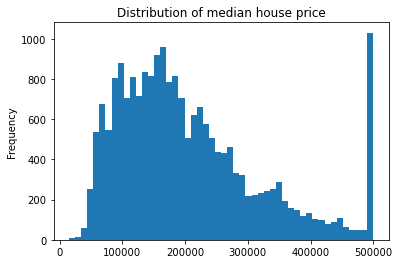

In [10]:
# distribution of odometer before replacement
df['median_house_value'].plot(kind='hist', bins=50, 
                              range=(df['median_house_value'].min(), 
                                     df['median_house_value'].max()), 
                              title='Distribution of median house price')
plt.show()

In [11]:
# top 3 median house ranges
pd.cut(df['median_house_value'], bins=50).value_counts()[:3]

(490300.96, 500001.0]    1030
(160499.6, 170199.64]     960
(150799.56, 160499.6]     921
Name: median_house_value, dtype: int64

### Observation
1) The distribution of median house prices is right skewed but with a sharp spike - an outlier at the \$500_000 value

2) About 1030 houses fall in the pricing range of (\\$490_300.96, \\$500_001.0] relative to the next highest number of 960 houses in the range (\\$160_499.6, \\$170_199.64]. Looks like there are more wealthy home owners in this dataset

### For this assignment use only the following features
- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value'

In [12]:
cols_to_use = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [13]:
new_df = df[cols_to_use].copy()

### q1
Find a feature with missing values. How many missing values does it have?

In [14]:
new_df['total_bedrooms'].isnull().sum()

207

### q2
What's the median (50% percentile) for variable 'population'?

In [15]:
new_df['population'].median()

1166.0

In [16]:
# manually shuffle and split creations
# n_train = int(len(idx) * .6)
# n_val = int(len(idx) * .2)
# # n_test = len(idx) - (n_train + n_val)
# idx = np.arange(100)
# np.random.shuffle(idx)
# idx[:n_train], idx[n_train: n_train + n_val], idx[n_train + n_val:]

In [17]:
train_df, val_df = train_test_split(new_df, test_size=0.2, random_state=42)
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [18]:
# are the splits unique
print('train versus val split -', set(train_df.index).intersection(set(val_df.index)))
print('train versus test split -', set(train_df.index).intersection(set(test_df.index)))
print('val versus test split -', set(val_df.index).intersection(set(test_df.index)))

train versus val split - set()
train versus test split - set()
val versus test split - set()


In [19]:
# check if the splits total up correctly
assert new_df.shape[0] == train_df.shape[0] + val_df.shape[0] + test_df.shape[0], "Split size doesn't match with total"

In [20]:
# median house price of the splits
train_df['median_house_value'].median(), val_df['median_house_value'].median(), test_df['median_house_value'].median()

(179600.0, 178650.0, 181300.0)

In [21]:
def prepare_data(x, field='total_bedrooms', 
                 fill_method='zero', train_mean=0):
    x = x.copy().reset_index(drop=True)
    if fill_method == 'zero':
        x[field].fillna(0, inplace=True)
    elif fill_method == 'mean':
        x[field].fillna(train_mean, inplace=True)
    else:
        raise Exception('Invalid fill method')
    y = np.log1p(x['median_house_value'])
    del x['median_house_value']
    return x, y

### q3
Which option gives better RMSE?

### Scenario 1
Fill 0s to populate the missing value for `total_bedrooms`

In [22]:
x_train, y_train = prepare_data(train_df)

In [23]:
x_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,38.00,-120.97,27.0,1683.0,288.0,873.0,258.0,4.7069
1,34.10,-117.87,15.0,6409.0,1363.0,3359.0,1267.0,3.8750
2,33.76,-117.85,26.0,2312.0,525.0,1273.0,437.0,2.8828
3,34.35,-119.74,34.0,1664.0,292.0,705.0,257.0,5.0000
4,38.50,-121.51,25.0,4719.0,745.0,1857.0,739.0,5.0371


In [24]:
def linear_regression(X, y, random_seed=42):
    np.random.seed(random_seed)
    X = np.column_stack((np.ones(X.shape[0]), X))
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [25]:
# perform linear regression
w0, w = linear_regression(x_train, y_train)

In [26]:
# compute the predictions
x_val, y_val = prepare_data(val_df)
y_pred = w0 + x_val.dot(w)

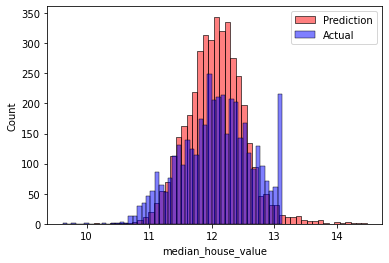

In [27]:
# plot predictions versus actuals
g1 = sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
g2 = sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
plt.legend(['Prediction', "Actual"])
plt.show()

In [28]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y-y_pred)**2, axis=0))

In [29]:
rmse_zero_fill = rmse(y_val, y_pred)

In [30]:
np.round(rmse_zero_fill, 2)

0.35

### Scenario 2
Fill missing value with mean value in the training set

In [31]:
train_mean = train_df['total_bedrooms'].mean()
x_train, y_train = prepare_data(train_df, fill_method='mean', train_mean=train_mean)

In [32]:
# perform linear regression
w0, w = linear_regression(x_train, y_train)

In [33]:
# compute the predictions
x_val, y_val = prepare_data(val_df, fill_method='mean', train_mean=train_mean)
y_pred = w0 + x_val.dot(w)

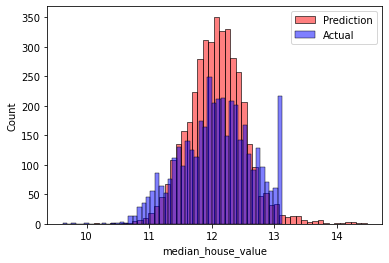

In [34]:
# plot predictions versus actuals
g1 = sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
g2 = sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
plt.legend(['Prediction', "Actual"])
plt.show()

In [35]:
rmse_mean_fill = rmse(y_val, y_pred)

In [36]:
np.round(rmse_mean_fill, 2)

0.35

In [37]:
# which is better?
np.round(rmse_mean_fill, 2) == np.round(rmse_zero_fill, 2)

True

In [38]:
def linear_regression_with_reg(X, y, reg=0.01, random_seed=42):
    np.random.seed(random_seed)
    X = np.column_stack((np.ones(X.shape[0]), X))
    XTX = X.T.dot(X)
    XTX += np.eye(XTX.shape[0]) * reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

### q4
Which `r` gives the best RMSE?

### Using Scenario 1
Run linear regression with different values of r and compute
the lowest RMSE

In [39]:
x_train, y_train = prepare_data(train_df)
x_val, y_val = prepare_data(val_df)

In [40]:
rmse_r = {}
for r in [0, 0.000001, 0.001, 0.01]:
    w0, w = linear_regression_with_reg(x_train, y_train, r)
    y_pred = w0 + x_val.dot(w)
    rmse_r[r] = np.round(rmse(y_val, y_pred), 2)

In [41]:
sorted(rmse_r.items(), key=lambda x:(x[1], x[0]))

[(0, 0.35), (1e-06, 0.35), (0.001, 0.35), (0.01, 0.35)]

### q5
What's the standard deviation of all the scores?

In [42]:
def train_test_val_split(df, test_size=0.2, random_seed=42):
    train_df, val_df = train_test_split(df, test_size=test_size, random_state=random_seed)
    train_df, test_df = train_test_split(train_df, test_size=test_size, random_state=random_seed)
    return train_df, val_df, test_df

In [43]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    train_df, val_df, test_df = train_test_val_split(new_df, random_seed=seed)
    x_train, y_train = prepare_data(train_df)
    x_val, y_val = prepare_data(val_df) 
    w0, w = linear_regression(x_train, y_train)
    y_pred = w0 + x_val.dot(w)
    rmse_scores.append(rmse(y_val, y_pred))
# print(rmse_scores)
print(f'Standard deviation of all the scores {np.round(np.std(rmse_scores), 3)}')

Standard deviation of all the scores 0.004


### q6
What's the RMSE on the test dataset?

In [44]:
train_df, val_df, test_df = train_test_val_split(new_df, random_seed=9)
x_train, y_train = prepare_data(train_df)
x_val, y_val = prepare_data(val_df)

In [45]:
x = pd.concat([x_train, x_val])
y = pd.concat([y_train, y_val])

In [46]:
x.shape, y.shape

((17337, 8), (17337,))

In [47]:
w0, w = linear_regression_with_reg(x, y, reg=0.001, random_seed=9)
x_test, y_test = prepare_data(test_df)
y_pred = w0 + x_test.dot(w)

In [48]:
np.round(rmse(y_test, y_pred), 3)

0.337